In [1]:
# Input
import re, math

parser = re.compile(r"(\d+), (\d+)")
points = []
x_min = math.inf
x_max = 0
y_min = math.inf
y_max = 0
with open("Input/6.txt") as file:
    for line in file:
        x, y = parser.match(line).groups()
        x, y = int(x), int(y)
        points.append((x, y))
        x_min = min(x, x_min)
        x_max = max(x, x_max)
        y_min = min(y, y_min)
        y_max = max(y, y_max)

In [2]:
from collections import Counter

# Distance
def dist(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

# Compute index of closest point
def closest(x, y):
    c = -1
    d = math.inf
    for i, (x2, y2) in enumerate(points):
        d2 = dist(x, y, x2, y2)
        if d2 < d:
            c = i
            d = d2
        elif d2 == d:
            # Two points at same distance
            c = -1
    return c

def sum_dist(x, y):
    return sum([dist(x, y, x2, y2) for (x2, y2) in points])

In [3]:
# Part 1
grid = [[closest(x, y) for y in range(y_min, y_max + 1)] for x in range(x_min, x_max + 1)]
counts = Counter([item for row in grid for item in row])

del counts[-1]
for item in grid[0]:
    counts[item] = -1
for item in grid[-1]:
    counts[item] = -1
for item in [row[0] for row in grid]:
    counts[item] = -1
for item in [row[-1] for row in grid]:
    counts[item] = -1
    
max_size = max(counts.values())
print(max_size)

5941


40244


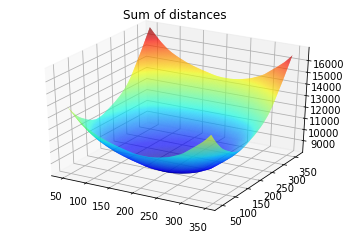

In [4]:
# Part 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x = np.array(range(x_min, x_max + 1))
y = np.array(range(y_min, y_max + 1))
X, Y = np.meshgrid(x, y)
Z = sum_dist(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.set_title('Sum of distances');

size = 0
for row in Z:
    for d in row:
        if d <= 10000:
            size += 1
        
print(size)